In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
# text in Western (Windows 1252)

import pickle
import numpy as np
# import StringIO
import math
from keras import optimizers, metrics
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.constraints import maxnorm
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
# from keras import backend as Input
np.random.seed(7)

Using Theano backend.


In [2]:
# %run ../../../prepare_data.py

import sys
sys.path.insert(0, '../../../')
from prepare_data import *

In [5]:
# X_train, X_other_features_train, y_train, X_validate, X_other_features_validate, y_validate = generate_full_matrix_inputs()
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', X_train, y_train, other_features = X_other_features_train)
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', X_validate, y_validate,  other_features = X_other_features_validate)
X_train, X_other_features_train, y_train = load_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', other_features=True)
X_validate, X_other_features_validate, y_validate = load_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', other_features=True)

In [24]:
# X_other_features = create_X_features(content)
# print (X_other_features[178200])
decode_position = 30
print (decode_input(X_train[decode_position], dictionary))
# print (X_other_features_train[0])
print (decode_X_features(feature_dictionary, [X_other_features_train[decode_position]]))
# print (len(X_other_features_train[0]))

navleèeta
Vmip3d--n
None


In [13]:
num_examples = len(X_train) # training set size
# nn_input_dim = max_word * len(dictionary) # input layer dimensionality
# nn_output_dim = max_num_vowels * max_num_vowels # output layer dimensionality
nn_output_dim = 11
nn_hdim = 516
batch_size = 16
actual_epoch = 20
num_fake_epoch = 20

# Gradient descent parameters (I picked these by hand)
# epsilon = 1 # learning rate for gradient descent
# reg_lambda = 1 # regularization strength

In [24]:
# word_processor = Sequential()
# word_processor.add(Conv1D(43, (3), input_shape=(23, 43), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(MaxPooling1D(pool_size=2))
# word_processor.add(Flatten())
# word_processor.add(Dense(516, activation='relu', kernel_constraint=maxnorm(3)))

# metadata_processor = Sequential()
# metadata_processor.add(Dense(256, input_dim=167, activation='relu'))

# model = Sequential()
# model.add(Merge([word_processor, metadata_processor], mode='concat'))  # Merge is your sensor fusion buddy
# model.add(Dense(1024, input_dim=(516 + 256), activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(nn_output_dim, activation='sigmoid'))


# -------------------------------------------------------

conv_input_shape=(23, 43)
othr_input = (167, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
x_conv = Conv1D(43, (3), padding='same', activation='relu')(conv_input)
x_conv = Conv1D(43, (3), padding='same', activation='relu')(x_conv)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)
# x_conv = Dense(516, activation='relu', kernel_constraint=maxnorm(3))(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')
x_othr = Dense(256, input_dim=167, activation='relu')(othr_input)
x_othr = Dropout(0.3)(x_othr)
x_othr = Dense(512, activation='relu')(othr_input)
x_othr = Dropout(0.3)(x_othr)
x_othr = Dense(256, activation='relu')(othr_input)

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)

# model = Model(inputs=[conv_input, othr_input], output=x)

In [25]:
model = Model(inputs=[conv_input, othr_input], outputs=x)

# epochs = 5
# lrate = 0.1
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Compile model
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit_generator(generate_fake_epoch(X_train, X_other_features_train, y_train, batch_size), X_train.shape[0]/(batch_size * num_fake_epoch), epochs=actual_epoch*num_fake_epoch, validation_data=([X_validate, X_other_features_validate], y_validate))

# model.fit([X_train, X_other_features_train], y_train, validation_data=([X_validate, X_other_features_validate], y_validate), epochs=1, batch_size=16)

Epoch 1/200
1336/1335 [==============================] - 77s - loss: 0.1952 - actual_accuracy: 0.2479 - val_loss: 0.1571 - val_actual_accuracy: 0.5056
Epoch 2/200
1336/1335 [==============================] - 83s - loss: 0.1469 - actual_accuracy: 0.4950 - val_loss: 0.1318 - val_actual_accuracy: 0.5832
Epoch 3/200
1336/1335 [==============================] - 90s - loss: 0.1181 - actual_accuracy: 0.6331 - val_loss: 0.1156 - val_actual_accuracy: 0.6585
Epoch 4/200
1336/1335 [==============================] - 101s - loss: 0.1054 - actual_accuracy: 0.6946 - val_loss: 0.1035 - val_actual_accuracy: 0.7077
Epoch 5/200
1336/1335 [==============================] - 98s - loss: 0.0968 - actual_accuracy: 0.7284 - val_loss: 0.0981 - val_actual_accuracy: 0.7272
Epoch 6/200
1336/1335 [==============================] - 117s - loss: 0.0915 - actual_accuracy: 0.7512 - val_loss: 0.0948 - val_actual_accuracy: 0.7443
Epoch 7/200
1336/1335 [==============================] - 116s - loss: 0.0864 - actual_accura

1336/1335 [==============================] - 104s - loss: 0.0271 - actual_accuracy: 0.9317 - val_loss: 0.0908 - val_actual_accuracy: 0.8314
Epoch 55/200
1336/1335 [==============================] - 104s - loss: 0.0264 - actual_accuracy: 0.9341 - val_loss: 0.0881 - val_actual_accuracy: 0.8401
Epoch 56/200
1336/1335 [==============================] - 103s - loss: 0.0274 - actual_accuracy: 0.9288 - val_loss: 0.0908 - val_actual_accuracy: 0.8341
Epoch 57/200
1336/1335 [==============================] - 110s - loss: 0.0267 - actual_accuracy: 0.9329 - val_loss: 0.0935 - val_actual_accuracy: 0.8369
Epoch 58/200
1336/1335 [==============================] - 102s - loss: 0.0257 - actual_accuracy: 0.9358 - val_loss: 0.0915 - val_actual_accuracy: 0.8399
Epoch 59/200
1336/1335 [==============================] - 104s - loss: 0.0258 - actual_accuracy: 0.9375 - val_loss: 0.0997 - val_actual_accuracy: 0.8361
Epoch 60/200
1336/1335 [==============================] - 113s - loss: 0.0257 - actual_accuracy

1336/1335 [==============================] - 117s - loss: 0.0159 - actual_accuracy: 0.9619 - val_loss: 0.1156 - val_actual_accuracy: 0.8487
Epoch 108/200
1336/1335 [==============================] - 112s - loss: 0.0155 - actual_accuracy: 0.9637 - val_loss: 0.1099 - val_actual_accuracy: 0.8484
Epoch 109/200
1336/1335 [==============================] - 121s - loss: 0.0150 - actual_accuracy: 0.9639 - val_loss: 0.1079 - val_actual_accuracy: 0.8486
Epoch 110/200
1336/1335 [==============================] - 134s - loss: 0.0150 - actual_accuracy: 0.9642 - val_loss: 0.1143 - val_actual_accuracy: 0.8489
Epoch 111/200
1336/1335 [==============================] - 133s - loss: 0.0140 - actual_accuracy: 0.9659 - val_loss: 0.1184 - val_actual_accuracy: 0.8495
Epoch 112/200
1336/1335 [==============================] - 131s - loss: 0.0153 - actual_accuracy: 0.9628 - val_loss: 0.1093 - val_actual_accuracy: 0.8504
Epoch 113/200
1336/1335 [==============================] - 123s - loss: 0.0148 - actual_ac

1336/1335 [==============================] - 111s - loss: 0.0104 - actual_accuracy: 0.9758 - val_loss: 0.1276 - val_actual_accuracy: 0.8587
Epoch 160/200
1336/1335 [==============================] - 112s - loss: 0.0113 - actual_accuracy: 0.9734 - val_loss: 0.1148 - val_actual_accuracy: 0.8576
Epoch 161/200
1336/1335 [==============================] - 112s - loss: 0.0105 - actual_accuracy: 0.9762 - val_loss: 0.1225 - val_actual_accuracy: 0.8519
Epoch 162/200
1336/1335 [==============================] - 108s - loss: 0.0105 - actual_accuracy: 0.9755 - val_loss: 0.1251 - val_actual_accuracy: 0.8494
Epoch 163/200
1336/1335 [==============================] - 108s - loss: 0.0099 - actual_accuracy: 0.9768 - val_loss: 0.1212 - val_actual_accuracy: 0.8544
Epoch 164/200
1336/1335 [==============================] - 109s - loss: 0.0097 - actual_accuracy: 0.9767 - val_loss: 0.1414 - val_actual_accuracy: 0.8477
Epoch 165/200
1336/1335 [==============================] - 112s - loss: 0.0105 - actual_ac

In [27]:
name = '10_epoch'
model.save(name + '.h5')
output = open(name + '_history.pkl', 'wb')
pickle.dump(history.history, output)
output.close()

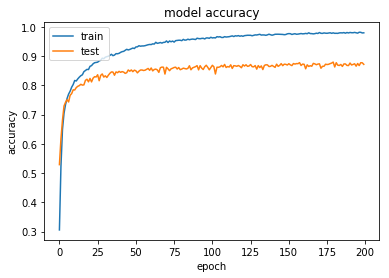

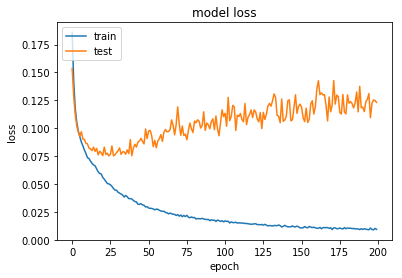

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['actual_accuracy'])
plt.plot(history.history['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model = load_model('test.h5')

In [6]:
h5f.close()

NameError: name 'h5f' is not defined

In [67]:
# evaluate the model
scores = model.evaluate([X_validate, X_other_features_validate], y_validate)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

108736/108961 [============================>.] - ETA: 0s
acc: 96.57%


In [187]:
pos = 0
print(decode_input(X_validate[pos], dictionary))
# predictions = model.predict([X_validate, X_other_features_validate])
predictions2 = model.predict([X_validate[pos:pos+1], X_other_features_validate[pos:pos+1]])
# print(predictions2)
print(np.round(predictions2)[0])
# predictions = np.round(predictions)
print(y_validate[pos])
# accuracy = sum([1 if np.all(y_validate[i] == predictions[i]) else 0 for i in range(X_validate.shape[0])])/float(X_validate.shape[0])
# print(accuracy)


import keras.backend as K

def act_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.mean(K.equal(K.round(y_true), K.round(y_pred)), axis=-1), 1.0))


def mean_pred2(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
#     return K.mean(K.all(K.equal(y_true, y_pred), axis=-1))
#     return K.equal(K.round(y_true), K.round(y_pred))

print(mean_pred(y_validate[pos], predictions[pos]).eval())
print(mean_pred(np.array([[ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 
                np.array([[ 0.,  0.51,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  0.92,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).eval())
# print(mean_pred(y_validate[pos], predictions[pos]))
# print(mean_pred2(y_validate[pos], predictions[pos]))
print(metrics.categorical_accuracy(y_validate[pos], predictions[pos]))

nerazloènejši
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
1.0
1.0
Elemwise{Cast{float32}}.0


In [ ]:
predictions = model.predict(X[429145:])

In [21]:
decode_position(predictions[0], max_num_vowels)

[1, 0]

In [23]:
def test_accuracy(predictions, y):
    dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
    num_of_pred = len(predictions)
    num_of_correct_pred = 0
    for i in range(predictions.shape[0]):
        if decode_position(predictions[i], max_num_vowels) == decode_position(y[i], max_num_vowels):
            num_of_correct_pred += 1

    return (num_of_correct_pred/float(num_of_pred)) * 100


print(test_accuracy(predictions, y[429145:]))

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
107287
96.5186835311


In [17]:
predictions.shape

(107287, 121)

In [12]:
print max_num_vowels

11


In [31]:
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
feature_dictionary = create_feature_dictionary(content)
def generate_input_from_word(word, max_word, dictionary):
    x = np.zeros((max_word, len(dictionary)))
    j = 0
    for c in list(word):
        index = 0
        for d in dictionary:
            if c == d:
                x[j, index] = 1
                break
            index += 1
        j += 1
    return x

# model = load_model()
# prediction = predict(model, generate_input_from_word('hidrija'))
# print decode_position(prediction[0])

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [190]:
%run ../../../prepare_data.py
# generate_X_and_y(dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels, feature_dictionary)